## TEAD ID: SWTID1726659740
# Project Name- Crude oil price prediction

# DATA PREPROCESSING
## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyt
import seaborn as sns
import tensorflow as tf

In [2]:
pwd

'C:\\Users\\lenovo\\Desktop'

In [3]:
import pandas as pd
data= pd.read_csv(r"C:\Users\lenovo\Downloads\Crude Oil Prices Daily.csv")
print(data.head())

       Date  Closing Value
0  1/2/1986          25.56
1  1/3/1986          26.00
2  1/6/1986          26.53
3  1/7/1986          25.85
4  1/8/1986          25.87


## Analyze the Data

In [4]:
data.head()

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [11]:
data.tail()

,Date,Closing Value
8218,7/3/2018,74.19
8219,7/4/2018,NaN
8220,7/5/2018,73.05
8221,7/6/2018,73.78
8222,7/9/2018,73.93


In [12]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


data.info()

## Handling missing values

In [14]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [15]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [16]:
data.dropna(axis=0,inplace=True)

In [17]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [18]:
data_oil = data.reset_index()['Closing Value']

In [19]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [20]:
print(data_oil.isnull().sum())
print(data_oil.shape)

0
(8216,)


In [21]:
data_oil.dropna(inplace=True)
print(data_oil.isnull().sum())
print(data_oil.shape)

0
(8216,)


In [22]:
print(data_oil.isnull().any())

False


## Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_oil = scaler.fit_transform(np.array(data_oil).reshape(-1, 1))


## Data Visualization

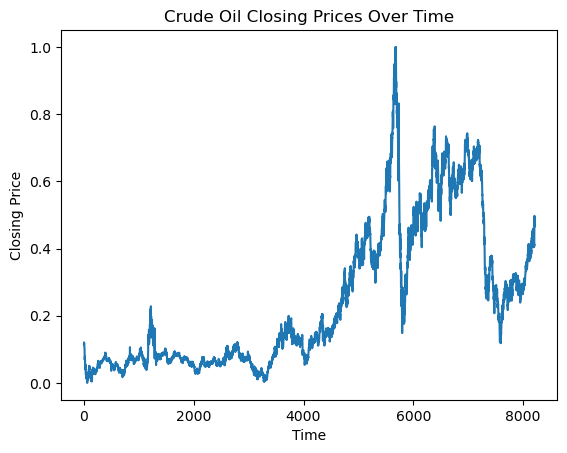

In [24]:
import matplotlib.pyplot as plt  # Use plt as the standard alias
plt.title('Crude Oil Closing Prices Over Time')
plt.plot(data_oil)
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

## Splitting Data into Train and Test

In [25]:
training_size = int(len(data_oil)*0.65)
test_size = len(data_oil) - training_size
train_data,test_data = data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [26]:
training_size, test_size
(5340, 2876)


(5340, 2876)

In [27]:
train_data.shape
(5340)

5340

In [28]:
import numpy as np

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  
        dataX.append(a)                    
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [29]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape,y_train.shape)

(5329, 10) (5329,)


In [31]:
print(X_test.shape,y_train.shape)

(2865, 10) (5329,)


In [32]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [33]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
# Model Building

In [ ]:
## Importing the Model Building Libraries

In [38]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Input

In [ ]:
## Initializing the model

In [39]:
model = Sequential()

In [ ]:
## Adding LSTM Layers

In [40]:
model.add(LSTM(50, return_sequences=True, input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

## Adding output Layers

In [41]:
model.add(Dense(1))

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

## Configure The Learning Process

In [43]:
model.compile(loss='mean_squared_error',optimizer='adam')

## Train The model

In [44]:
model.fit(X_train, y_train, validation_data=(X_test,ytest), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 0.0055 - val_loss: 8.8414e-04
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.3258e-04 - val_loss: 7.6096e-04
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.1566e-04 - val_loss: 8.1974e-04
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.1804e-04 - val_loss: 7.6955e-04
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.1955e-04 - val_loss: 0.0011
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.1475e-04 - val_loss: 7.9172e-04
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.3041e-04 - val_loss: 8.3297e-04
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.1645e-04 - val_loss: 7.7667e-04
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.1570e-04 - val_loss: 9.2034e-04
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.0593e-04 - val_loss: 0.0027


In [45]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


## Model Evaluation

In [47]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3827.0821056981763

## Save the Model

In [49]:
from tensorflow.keras.models import load_model

In [52]:
model.save('Crude_oil_price_prediction.keras')